In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/browsing-history/py-insight_data.xlsx


In [133]:
import pandas as pd
from urllib.parse import urlparse

# Load the dataset
df = pd.read_excel("/kaggle/input/browsing-history/py-insight_data.xlsx")


In [134]:
df.rename(columns={'Cagetory': 'Category'}, inplace=True)
df.sort_values(by='eventtimeutc')

,OrgId,ParticipantId,DeviceId,url,url_type,eventtimeutc,transition,Url_domain_link,title,Category,visitId,referringVisitId,eventtime
5102,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,Valid,2025-01-21 16:30:35.229,typed,https://www.avios.com,Convert Avios: Nectar &#44; Finnair Plus &#44...,Avios,160209,0,2025-01-21 03:00:35
5103,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,Valid,2025-01-21 16:30:36.207,link,https://www.avios.com,Convert Avios: Nectar &#44; Finnair Plus &#44...,Avios,160210,0,2025-01-21 03:00:36
5101,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,Valid,2025-01-21 16:30:37.059,link,https://www.avios.com,Convert Avios: Nectar &#44; Finnair Plus &#44...,Avios,160211,0,2025-01-21 03:00:37
5100,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/u/login?st...,Valid,2025-01-21 16:30:39.407,link,https://accounts.britishairways.com,British Airways log in,British Airways,160213,160212,2025-01-21 03:00:39
5095,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/security/?...,Valid,2025-01-21 16:30:49.624,form_submit,https://accounts.britishairways.com,British Airways,British Airways,160218,160217,2025-01-21 03:00:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,Valid,2025-02-21 13:27:40.972,link,https://py-insights.com,PY Insights | Product,PY Insights,166319,0,2025-02-20 23:57:40
5,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,Valid,2025-02-21 13:27:40.975,link,https://py-insights.com,PY Insights | Product,PY Insights,166320,0,2025-02-20 23:57:40
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,Valid,2025-02-21 13:27:40.988,link,https://py-insights.com,PY Insights | Product,PY Insights,166321,0,2025-02-20 23:57:40
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,Valid,2025-02-21 13:27:51.308,link,https://chromewebstore.google.com,Snapshot - Chrome Web Store,Chrome,166327,166326,2025-02-20 23:57:51


In [93]:
top_transition=df["transition"].value_counts().head(10)
print(top_transition)

transition
link               4098
reload              321
generated           259
form_submit         204
auto_toplevel       113
typed               105
auto_bookmark         3
manual_subframe       1
Name: count, dtype: int64


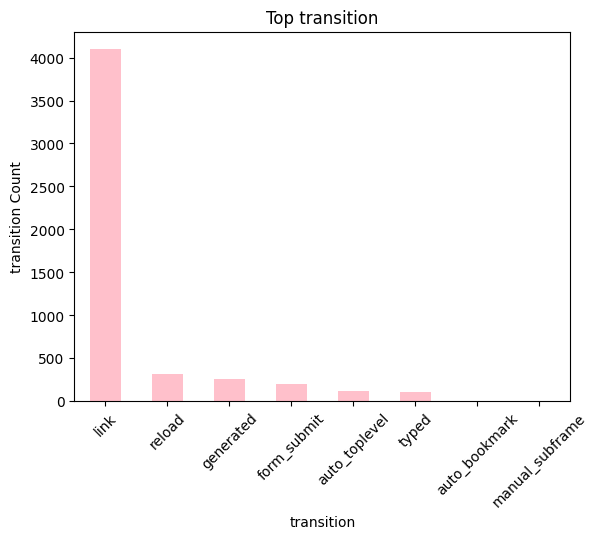

In [10]:
import matplotlib.pyplot as plt
import numpy as np

top_transition.plot(kind="bar", color="pink")
plt.xlabel("transition")
plt.ylabel("transition Count")
plt.title("Top transition")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Filter out the 'Others' category
filtered_df = df[df["Category"] != "Others"]

# Calculate value counts and get the top 10
top_categories = filtered_df["Category"].value_counts().head(10)

print(top_categories)

Category
Google Search             704
Upwork                    473
Google Flights            457
Amazon                    331
Google                    141
Py-insight sharepoints    133
LoopNet                   133
ZIPAIR                    107
Wellfound                 107
Facebook                  104
Name: count, dtype: int64


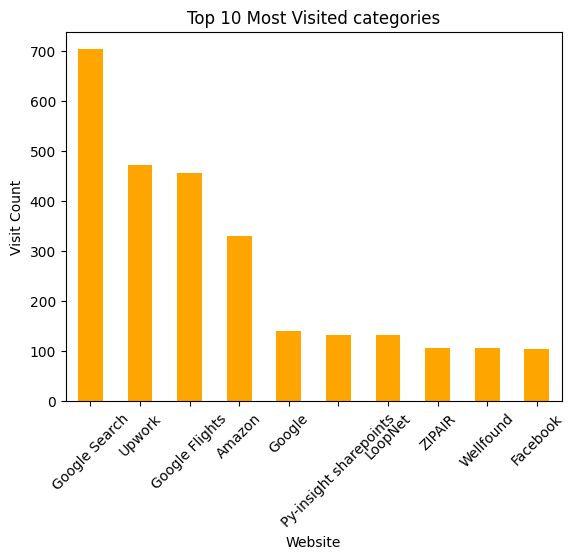

In [13]:
top_categories.plot(kind="bar", color="orange")
plt.xlabel("Website")
plt.ylabel("Visit Count")
plt.title("Top 10 Most Visited categories")
plt.xticks(rotation=45)
plt.show()

In [173]:
top_domains = df["Url_domain_link"].value_counts().head(10)
print(top_domains)


Url_domain_link
https://www.google.com                      1328
https://www.upwork.com                       473
https://mail.google.com                      149
https://pyinsightscom.sharepoint.com         140
https://www.loopnet.com                      133
https://eu-west-1.console.aws.amazon.com     128
https://www.amazon.in                        123
https://wellfound.com                        107
https://www.zipair.net                       106
https://www.facebook.com                     104
Name: count, dtype: int64


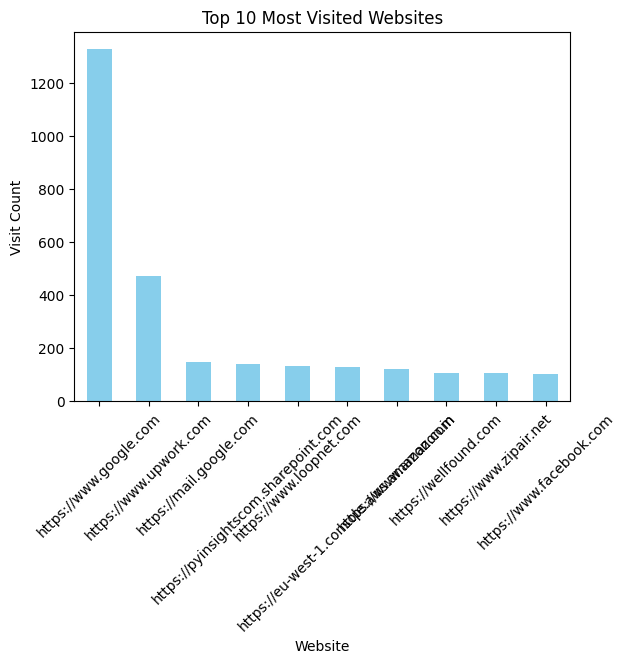

In [14]:
import matplotlib.pyplot as plt

top_domains.plot(kind="bar", color="skyblue")
plt.xlabel("Website")
plt.ylabel("Visit Count")
plt.title("Top 10 Most Visited Websites")
plt.xticks(rotation=45)
plt.show()


In [15]:
df["eventtimeutc"] = pd.to_datetime(df["eventtimeutc"])
df["Date"] = df["eventtimeutc"].dt.date
df["Time"] = df["eventtimeutc"].dt.time
df["hour"] = df["eventtimeutc"].dt.hour

In [16]:
# Find peak browsing Days
peak_days = df["Date"].value_counts().sort_values(ascending=False)
print(peak_days.head(10))

Date
2025-01-29    621
2025-02-20    400
2025-01-30    320
2025-02-19    293
2025-02-16    254
2025-01-27    252
2025-02-03    243
2025-02-18    234
2025-02-21    218
2025-01-31    207
Name: count, dtype: int64


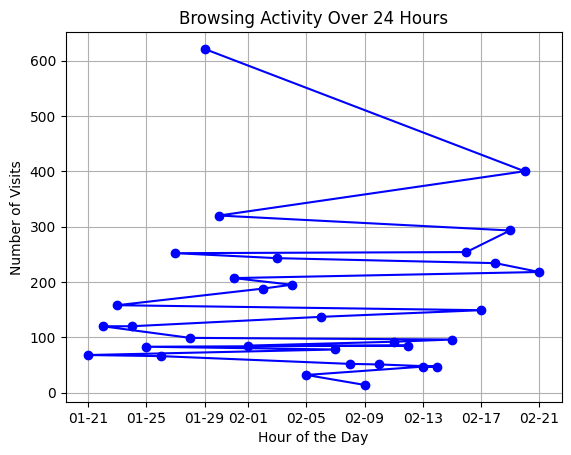

In [18]:
import matplotlib.dates as mdates
peak_days.plot(kind="line", marker="o", color="blue")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity across month")
plt.grid()
plt.show()


In [19]:
# Find peak browsing hours
peak_hours = df["hour"].value_counts().sort_values(ascending=False)
print(peak_hours)


hour
10    500
11    440
9     369
22    352
3     335
12    311
23    273
13    247
0     238
5     212
6     204
17    204
1     192
21    144
18    143
8     142
19    124
20    122
2     119
16    111
4     107
7      98
14     81
15     36
Name: count, dtype: int64


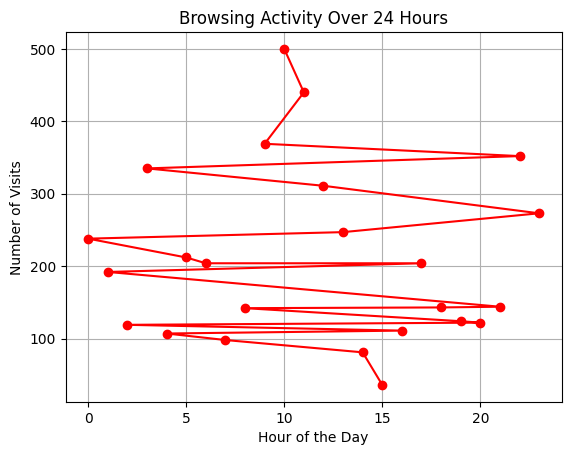

In [20]:
peak_hours.plot(kind="line", marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity Over 24 Hours")
plt.grid()
plt.show()


# Confirm that each visitId is unique.


In [30]:
duplicate = df.duplicated(["visitId"]).value_counts()

if True in duplicate and duplicate[True] > 0:  # Check if there are any duplicates
    print("data errors")
else:
    print("No duplicate visitId values found.")

No duplicate visitId values found.


# Calculates time differences for common IDs between visit_ids and referring_visit_ids :

In [150]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Get all unique visitIds
visit_ids = set(df['visitId'])

# Get all unique referringVisitIds (excluding NaN values)
referring_visit_ids = set(df['referringVisitId'].dropna())

# Find the intersection (common IDs)
common_ids = sorted(visit_ids.intersection(referring_visit_ids))

In [163]:
import pandas as pd


def calculate_time_diff_for_common_ids(df, common_ids):
    """Calculates time differences for common IDs between sessions."""
    time_diffs = []
    for common_id in common_ids:
        # Get the last event time for the common ID as a referring ID
        last_referring_time = df[df['referringVisitId'] == common_id]['eventtimeutc'].max()

        # Get the first event time for the common ID as a visit ID
        first_visit_time = df[df['visitId'] == common_id]['eventtimeutc'].min()

        # Calculate the time difference
        #time_diff = (first_visit_time - last_referring_time)
        time_diff = (last_referring_time - first_visit_time )

        time_diffs.append({
            'commonId': common_id,
            'time_diff': time_diff
        })

    return pd.DataFrame(time_diffs)

# Example usage:
time_diffs_df = calculate_time_diff_for_common_ids(df, common_ids)
print(time_diffs_df)

      commonId              time_diff
0       160213 0 days 00:00:46.082000
1       160218 0 days 00:00:34.517000
2       160229 3 days 01:06:08.916000
3       160233 0 days 00:00:11.318000
4       160238 0 days 00:01:30.249000
...        ...                    ...
1052    166296 0 days 00:00:12.474000
1053    166297 0 days 00:00:03.854000
1054    166298 0 days 00:00:04.125000
1055    166310 0 days 00:00:10.369000
1056    166317 0 days 00:14:56.976000

[1057 rows x 2 columns]


In [167]:

# Find the row with the highest time_difference
highest_time_diffs_row = time_diffs_df.loc[time_diffs_df['time_diff'].idxmax()]

print(highest_time_diffs_row['commonId'],"Has an Highest time differnece was about ->  ", highest_time_diffs_row['time_diff'])

161537 Has an Highest time differnece was about ->   20 days 04:43:25.682000


# Highest navigation paths using id's :

In [146]:
def extract_navigation_paths_for_common_ids(df, common_ids):
    navigation_paths =[]
   
    for common_id in common_ids:
        # Get all rows related to the common ID (both as visitId and referringVisitId)
        related_rows = df[(df['visitId'] == common_id) | (df['referringVisitId'] == common_id)]

        # Sort the rows by event time
        related_rows = related_rows.sort_values('eventtimeutc')

        # Extract the navigation path
        path = ' -> '.join(related_rows['url'].tolist())
        path_count = len(related_rows['url'])

        navigation_paths.append({'commonId': common_id, 'navigation_path': path, 'path_count': path_count})

    return pd.DataFrame(navigation_paths)

navigation_paths_common_df = extract_navigation_paths_for_common_ids(df, common_ids)
print(navigation_paths_common_df)

      commonId                                    navigation_path  path_count
0       160213  https://accounts.britishairways.com/u/login?st...           2
1       160218  https://accounts.britishairways.com/security/?...           3
2       160229  https://docs.google.com/document/ -> https://d...           2
3       160233  https://eu-west-1.signin.aws.amazon.com/oauth?...           2
4       160238  https://eu-west-1.console.aws.amazon.com/cogni...           2
...        ...                                                ...         ...
1052    166296  https://joinmosaic.myaccountinfo.com/Autopay/B...           2
1053    166297  https://joinmosaic.myaccountinfo.com/ -> https...           2
1054    166298  https://joinmosaic.myaccountinfo.com/AutoPay/S...           2
1055    166310  https://docs.google.com/document/ -> https://d...           3
1056    166317  https://cs-rtl.my.salesforce-sites.com/cts?Id=...           2

[1057 rows x 3 columns]


In [149]:
# Find the row with the highest path_count
highest_path_count_row = navigation_paths_common_df.loc[navigation_paths_common_df['path_count'].idxmax()]

# Print the highest path count and the corresponding path
print("Highest Path Count:", highest_path_count_row['path_count'])
print("Navigation Path:", highest_path_count_row['navigation_path'])

Highest Path Count: 85
Navigation Path: https://wellfound.com/login -> https://wellfound.com/ -> https://wellfound.com/recruit/dashboard -> https://wellfound.com/recruit/applicants/jobs -> https://wellfound.com/recruit/applicants/jobs/1916548 -> https://wellfound.com/recruit/applicants/jobs/1916548 -> https://wellfound.com/recruit/jobs/1916548 -> https://wellfound.com/recruit/jobs -> https://wellfound.com/recruit/applicants/jobs -> https://wellfound.com/recruit/applicants/jobs/1916548 -> https://wellfound.com/recruit/applicants/jobs/201668 -> https://wellfound.com/recruit/jobs/201668 -> https://wellfound.com/recruit/jobs/201668/edit -> https://wellfound.com/recruit/jobs/201668 -> https://wellfound.com/recruit/applicants/jobs/201668 -> https://wellfound.com/recruit/jobs/201668 -> https://wellfound.com/recruit/jobs/201668/edit -> https://wellfound.com/recruit/jobs/201668/promotion -> https://wellfound.com/recruit/jobs/201668/edit -> https://wellfound.com/recruit/applicants/jobs -> https: